# Experimenting w. FaceBook's forecasting tool Prophet

Links:
- [Quick Start](https://facebookincubator.github.io/prophet/docs/quick_start.html)
- [Installation](https://facebookincubator.github.io/prophet/docs/installation.html)

Quick install:

```bash
conda install -c conda-forge fbprophet.
```

In [27]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [4]:
import datetime

In [11]:
df = pd.DataFrame({
    "ds": map(lambda x: x + "-01-01" ,map(str, range(2006, 2017))),
    "y": range(0, 11)
})

df

,ds,y
0,2006-01-01,0
1,2007-01-01,1
2,2008-01-01,2
3,2009-01-01,3
4,2010-01-01,4
5,2011-01-01,5
6,2012-01-01,6
7,2013-01-01,7
8,2014-01-01,8
9,2015-01-01,9


In [12]:
m = Prophet()

In [13]:
m.fit(df);

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [18]:
future = map(lambda x: x + "-01-01" ,map(str, range(2017, 2019))),

In [29]:
future = m.make_future_dataframe(periods=365*3)

In [31]:
future.tail(4)

,ds
1102,2018-12-28
1103,2018-12-29
1104,2018-12-30
1105,2018-12-31


In [32]:
forecast = m.predict(future)

In [33]:
forecast.tail()

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
1101,2018-12-27,1.298740,12.985467,0.013121,0.013121,12.982248,12.988360,12.995161,13.001838,0.013121,0.013121,0.013121,0.013121,12.998588
1102,2018-12-28,1.299014,12.988205,0.011022,0.011022,12.984980,12.991104,12.995739,13.002555,0.011022,0.011022,0.011022,0.011022,12.999227
1103,2018-12-29,1.299288,12.990943,0.008699,0.008699,12.987712,12.993847,12.995998,13.003056,0.008699,0.008699,0.008699,0.008699,12.999642
1104,2018-12-30,1.299562,12.993681,0.006196,0.006196,12.990444,12.996590,12.996450,13.003300,0.006196,0.006196,0.006196,0.006196,12.999877
1105,2018-12-31,1.299836,12.996419,0.003561,0.003561,12.993179,12.999334,12.996535,13.003324,0.003561,0.003561,0.003561,0.003561,12.999980


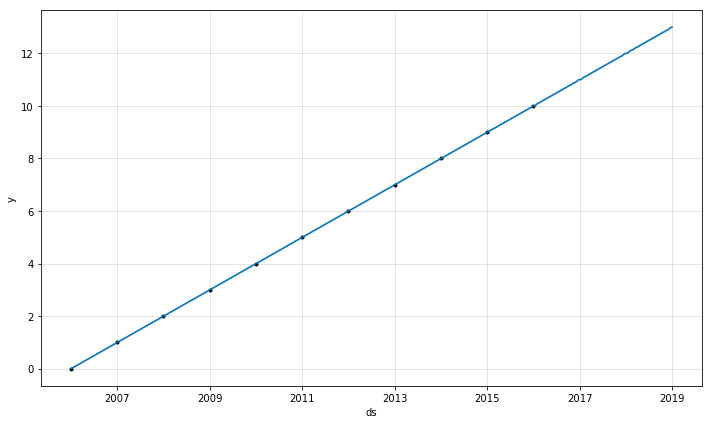

In [34]:
m.plot(forecast);